# Problem Statement

The dataset consists of users, reviews, sentiment of the users of an e-commerce company. In a product recommendation system , sentiment analysis helps to recommend better products to the customer. This notebook only consists of pre-processing and EDA of the reviews_text.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import joblib
%matplotlib inline

In [3]:
df = pd.read_csv("sample30.csv")
df

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,I got this conditioner with Influenster to try...,Softness!!,NaN,NaN,laurasnchz,Positive
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purpose...",I love it,NaN,NaN,scarlepadilla,Positive
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product....,Hair is so smooth after use,NaN,NaN,liviasuexo,Positive
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,NaN,NaN,ktreed95,Positive


## Data Cleaning

### Handling missing values

In [4]:
# checking null values
df.isnull().sum()*100/len(df)

## reviews_userCity and reviews_userProvince has the most missing values

id                       0.000000
brand                    0.000000
categories               0.000000
manufacturer             0.470000
name                     0.000000
reviews_date             0.153333
reviews_didPurchase     46.893333
reviews_doRecommend      8.566667
reviews_rating           0.000000
reviews_text             0.000000
reviews_title            0.633333
reviews_userCity        93.570000
reviews_userProvince    99.433333
reviews_username         0.210000
user_sentiment           0.003333
dtype: float64

In [5]:
df['reviews_didPurchase']=df['reviews_didPurchase'].fillna(False)
df['reviews_doRecommend']=df['reviews_doRecommend'].fillna(False)

In [6]:
df['reviews_username']=df['reviews_username'].fillna('Unknown')

In [7]:
df=df.drop(['reviews_userCity','reviews_userProvince'],axis=1)

In [8]:
df['manufacturer']=df['manufacturer'].fillna('unknown')

In [9]:
# since only one row has missing sentiment we can use this to predict
predict_text = df[df['user_sentiment'].isnull()]['reviews_text']

In [10]:
df.dropna(subset=['user_sentiment'],axis=0,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29999 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29953 non-null  object
 6   reviews_didPurchase  29999 non-null  bool  
 7   reviews_doRecommend  29999 non-null  bool  
 8   reviews_rating       29999 non-null  int64 
 9   reviews_text         29999 non-null  object
 10  reviews_title        29809 non-null  object
 11  reviews_username     29999 non-null  object
 12  user_sentiment       29999 non-null  object
dtypes: bool(2), int64(1), object(10)
memory usage: 2.8+ MB


In [12]:
# filtering the columns that are relevant
columns=['id','brand','categories','reviews_didPurchase','reviews_doRecommend','reviews_rating','reviews_text','reviews_username','user_sentiment']
df_final = df[columns]
df_final.head()

,id,brand,categories,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",False,False,5,i love this album. it's very good. more to the...,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",True,False,5,Good flavor. This review was collected as part...,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",True,False,5,Good flavor.,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",False,False,1,I read through the reviews on here before look...,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",False,False,1,My husband bought this gel for us. The gel cau...,walker557,Negative


## Exploratory Data Analysis

## Univariate analysis
### Class imbalance

In [19]:
# 1. Is there class imbalance in the data
df_final['user_sentiment'].value_counts(normalize=True)

# There is class imbalance as we can see that 88% of data has positive reviews.

Positive    0.887763
Negative    0.112237
Name: user_sentiment, dtype: float64

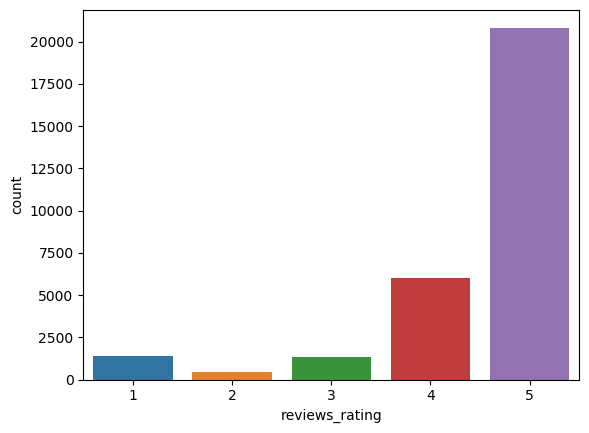

In [20]:
# 2.Frequency plot of rating
sns.countplot(df_final['reviews_rating'])

In [21]:
#4. frequency plot of reviews purchase

df_final['reviews_didPurchase'].value_counts(normalize=True)

False    0.952198
True     0.047802
Name: reviews_didPurchase, dtype: float64

In [22]:
#5. frequency plot of reviews do recommend
df_final['reviews_doRecommend'].value_counts(normalize=True)

True     0.862662
False    0.137338
Name: reviews_doRecommend, dtype: float64

In [23]:
# top 5 brands which are reviewed
df_final['brand'].value_counts()[0:5]


Clorox               10585
Warner Home Video     3325
Disney                1199
L'oreal Paris         1186
FOX                    887
Name: brand, dtype: int64

### Word analysis

Analysing pair of words for positive and negative reviews. Word pairs-ADJ-NOUN are extracted to help understand the pair of words that might appear in identifying the sentiment of a sentence.

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import spacy
model = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
# function to find ADJ-NOUN pairs in a sentence
tokens=model(df['reviews_text'][1])
def form_pair_words(text):
  pair_words=""
  tokens=model(text)
  for i in range(len(tokens)):
    token = tokens[i]
    if token.pos_=='ADJ' and tokens[i-1].pos_ =='ADV':
        pair_words=pair_words + tokens[i-1].text+" " +token.text+","
    if token.pos_=='NOUN' and tokens[i-1].pos_=='ADJ':
        pair_words=pair_words + tokens[i-1].text+" " +token.text+","

  return pair_words

In [20]:
# checking how adjectives influence sentiment of the text
positive_words=" ".join(df[df['user_sentiment']=='Positive'][0:20]['reviews_text'].apply(form_pair_words))
positive_words

# words like good , great, refreshing are seen more often in positive sentiment

'very good,current pop,just crazy, Good flavor, Good flavor, plain KY,lube wish,  First time,too much, better reviews, much better,very pleasurable,pleasurable experience,only drawback,sticky hand,long way,very careful, good experiance,pretty good,good sensation, few times,too bad,most products,  good product,great feeling, very long,long way,slight warming,excellent choice,intimate lubricant,free product, warm feeling,other lubricants,very easy, Exceptional product,Great way, first time,entire time, well Great,Great product, yucky ingredients,major brands,organic choices,as good,nastier brands,pretty much,- lotion,absolutely right, refreshing fragrance,favorite hand, '

In [21]:
negative_words=" ".join(df[df['user_sentiment']=='Negative'][0:20]['reviews_text'].apply(form_pair_words))
negative_words


'of enhanced,messy consistency,more liquid,personal lubricant,less money,less mess,  highly disappointed,similar affect,  very sticky, extra fun,extremely disappointed,sticky mess, no different, very disappointed, very disappointed, all such,  Very disappointing, first time,first time,   same container, new formula,too thick,old formula,so light, improved formula,much thinner,improved formula,new moisturizer, daily moisturizer,great job,first container,new formula,old formula, several days,'

### Most reviewed categories

In [22]:
# combine all categories into one
all_categories="".join(df['categories'])
categories_list = all_categories.split(",")


In [23]:
# most common  categories
from collections import Counter
Counter(categories_list).most_common(5)

[('Featured Brands', 14679),
 ('Health & Household', 11314),
 ('Household Supplies', 11238),
 ('Household Cleaning', 11103),
 ('Home And Storage & Org', 11065)]

## Bivariate analysis

### Distribution of rating and sentiment

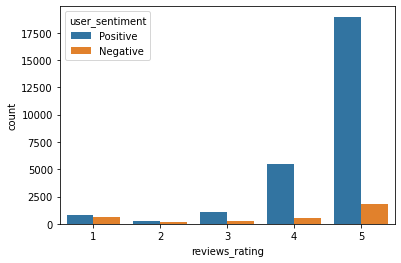

In [24]:
#bivariate 
sns.countplot(x='reviews_rating',hue='user_sentiment',data=df_final)

## Data pre-processing

### Mapping positive to 1 and negative to 0

In [13]:
df_final['user_sentiment']=df_final['user_sentiment'].map({'Positive':1,'Negative':0})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# BOW model

Creating bag of words representation of the reviews text

In [14]:
vec = CountVectorizer(stop_words='english')
X=vec.fit_transform(df_final['reviews_text'])

In [26]:
X_transformed= X.toarray()

In [27]:
y= df_final['user_sentiment']

In [28]:
joblib.dump(X_transformed,"bow_features")
joblib.dump(y,"target")

['target']

## TF-IDF

Creating TF-IDF representation of the reviews text

In [13]:
vec = TfidfVectorizer(stop_words='english')
tf_idf=vec.fit_transform(df_final['reviews_text'])
joblib.dump(tf_idf.toarray(),'tf_idf_features')

['tf_idf_features']

In [14]:
import pickle
with open('tf_idf_model.pkl','wb') as f:
    pickle.dump(vec,f)